In [20]:
from collections import deque

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from ucimlrepo import fetch_ucirepo


%matplotlib inline

## KMeans Clustering from scratch

In [2]:
# fetch dataset from UCIrivine repo
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = np.asarray(iris.data.features, dtype=np.float32)
y = np.asarray(pd.factorize(iris.data.targets['class'])[0], dtype=np.int16)



### The EM Algoritm for KMeans

In [8]:
def k_means(X, k=10, max_iterations=50, threshold=0.0001, metric='euclidean'):
    mu_arr = X[np.random.choice(len(X), k, replace=False)]
    pi = None
    obj = np.inf

    for _ in range(max_iterations):
        pi = np.zeros((len(X), k), dtype=np.ushort)
         # E-step
        distances = sc.spatial.distance.cdist(X, mu_arr, metric=metric)
        c_labels = np.argmin(distances, axis=1)
        for i in range(len(c_labels)):
            pi[i, c_labels[i]] = 1  # Set new labels
        
        # M-step
        for j in range(k):
            elements_of_j = np.where(c_labels == j)
            mu_arr[j] = np.mean(X[elements_of_j], axis=0)

        new_obj = np.sum(pi * distances)
        if float(abs(obj - new_obj)) < (obj * threshold):  # termination criterion
            break
        obj = new_obj

    return obj, pi, mu_arr

In [3]:
_, pi, mus = k_means(X, k=3, max_iterations=50, metric='euclidean')
c_labels_euclid = np.argwhere(pi == 1)[:, 1]

NameError: name 'k_means' is not defined

In [28]:
class DBScan:

    def __init__(self, epsilon: float, min_pts=3, metric='euclidean'):
        self.epsilon = epsilon
        self.min_pts = min_pts
        self.metric = metric

    def fit(self, x_train: np.ndarray):
        self.x_train = x_train
        self.x_size = self.x_train.shape[0]

    def _find_neighbours(self) -> np.ndarray:
        dist = cdist(self.x_train, self.x_train, metric=self.metric)
        np.fill_diagonal(dist, 1)
        dist[dist >= self.epsilon] = 0
        dist[dist < self.epsilon] = 1
        return np.asarray(dist, dtype=np.uint8)

    def transform(self) -> np.ndarray:
        nbs = self._find_neighbours()
        clusters = -1 * np.ones(shape=self.x_size, dtype=np.int32)
        core = np.asarray([i for i in range(self.x_size)
                           if np.sum(nbs[i]) >= self.min_pts]
                          , dtype=np.int32)
        id = 1
        # print(clusters[0] == -1 and np.sum(nbs[0]) >= self.min_pts)
        while np.any(clusters[core] < 0):
            q = deque()
            node = np.random.choice(core[clusters[core] < 0])
            q.append(node)

            while len(q) > 0:
                pt = q.popleft()
                clusters[pt] = id
                neighbors =  np.argwhere(nbs[pt])
                print(nbs[pt], end=";")
                for i in neighbors:
                    # print(i)
                    if clusters[i] == -1 and np.sum(nbs[i]) >= self.min_pts:
                        q.append(i)
                    clusters[i] = id

            id += 1
        return clusters


In [29]:
dbscan = DBScan(epsilon=0.001, min_pts=3, metric='euclidean')
dbscan.fit(X)
db_clusters = dbscan.transform()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1];[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1]];

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Visualizing clusters with PCA

In [12]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)


Text(0.5, 1.0, 'Iris: PCA, true labels')

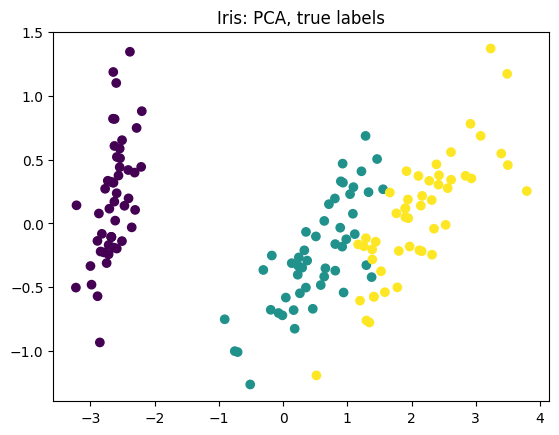

In [13]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("Iris: PCA, true labels")

Text(0.5, 1.0, 'Iris: PCA, K-Means clusters with euclidean distance')

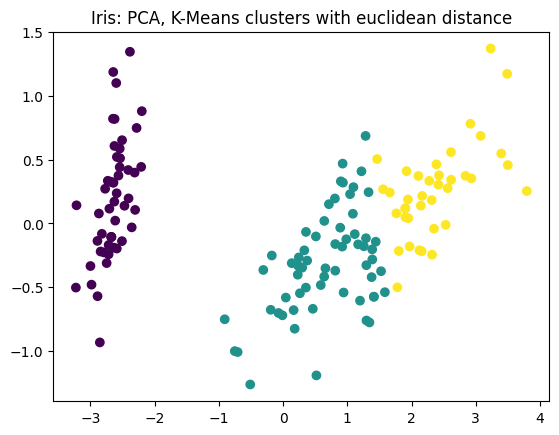

In [14]:
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=c_labels_euclid)
plt.title("Iris: PCA, K-Means clusters with euclidean distance")

Text(0.5, 1.0, 'Iris: PCA, DBScan clusters with euclidean distance')

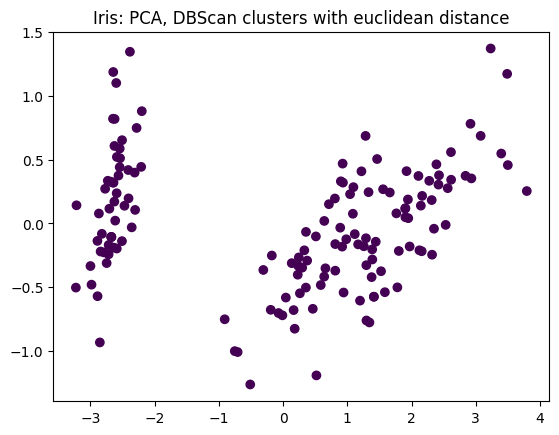

In [25]:
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=db_clusters)
plt.title("Iris: PCA, DBScan clusters with euclidean distance")

### Performance Evaluation

In [57]:
# Silhouette score with euclidean distance 
silhouette_score(X, c_labels_euclid)

0.5509644

In [58]:
_, pi, mus = k_means(X, k=3, max_iterations=50, metric='cosine')
c_labels_cosine = np.argwhere(pi == 1)[:, 1]

Text(0.5, 1.0, 'Iris: PCA, true labels')

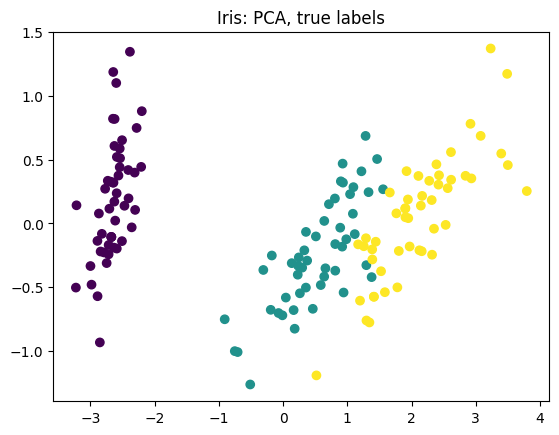

In [59]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("Iris: PCA, true labels")

Text(0.5, 1.0, 'Iris: PCA, K-Means clusters with cosine distance')

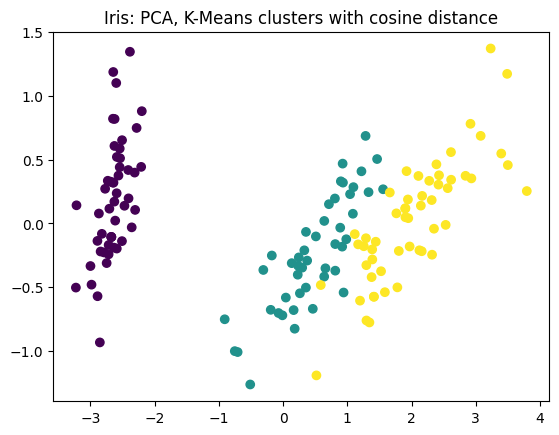

In [60]:
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=c_labels_cosine)
plt.title("Iris: PCA, K-Means clusters with cosine distance")

In [61]:
# Silhouette score with euclidean distance 
silhouette_score(X, c_labels_cosine)

0.4939753

Although cosine distance show cluster labels closer to true labels, it's silhouette score shows that it underperforms.